In [2]:
#importing the data in DataFrame df
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import linear_model  #for linear regression
df=pd.read_csv("heart.csv")
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#looking for missing data values
df.isnull().sum()

In [4]:
#Above result shows that there is no missing data.
#Taking first 10 rows for analysis
df.head(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
# lets rename columns for better readability
df=df.rename(columns ={"chol":"Cholestrol","ca":"cardiac_arrest","thalach":"tahacemia_count"})



In [6]:
df

,age,sex,cp,trestbps,Cholestrol,fbs,restecg,tahacemia_count,exang,oldpeak,slope,cardiac_arrest,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [7]:
df

,age,sex,cp,trestbps,Cholestrol,fbs,restecg,tahacemia_count,exang,oldpeak,slope,cardiac_arrest,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [8]:
#grouping the dataframe with sex as male and female
grp=df.groupby("sex")


In [9]:
grp.max() #getting max conditions of male and female patients

,age,cp,trestbps,Cholestrol,fbs,restecg,tahacemia_count,exang,oldpeak,slope,cardiac_arrest,thal,target
sex,,,,,,,,,,,,,
0,76,3,200,564,1,2,192,1,6.2,2,3,3,1
1,77,3,192,353,1,2,202,1,5.6,2,4,3,1


In [10]:
#getting  splitted dataframes based on sex in groupbyDataframe object
male=grp.get_group(0) #0 means sex == 0,female
female=grp.get_group(1) #1 means sex == 1,male
male
# we will analyse further based on male and female patients

,age,cp,trestbps,Cholestrol,fbs,restecg,tahacemia_count,exang,oldpeak,slope,cardiac_arrest,thal,target
2,41,1,130,204,0,0,172,0,1.4,2,0,2,1
4,57,0,120,354,0,1,163,1,0.6,2,0,2,1
6,56,1,140,294,0,0,153,0,1.3,1,0,2,1
11,48,2,130,275,0,1,139,0,0.2,2,0,2,1
14,58,3,150,283,1,0,162,0,1.0,2,0,2,1
15,50,2,120,219,0,1,158,0,1.6,1,0,2,1
16,58,2,120,340,0,1,172,0,0.0,2,0,2,1
17,66,3,150,226,0,1,114,0,2.6,0,0,2,1
19,69,3,140,239,0,1,151,0,1.8,2,2,2,1
25,71,1,160,302,0,1,162,0,0.4,2,2,2,1


In [11]:
female

,age,cp,trestbps,Cholestrol,fbs,restecg,tahacemia_count,exang,oldpeak,slope,cardiac_arrest,thal,target
0,63,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,2,130,250,0,1,187,0,3.5,0,0,2,1
3,56,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,0,140,192,0,1,148,0,0.4,1,0,1,1
7,44,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,2,150,168,0,1,174,0,1.6,2,0,2,1
10,54,0,140,239,0,1,160,0,1.2,2,0,2,1
12,49,1,130,266,0,1,171,0,0.6,2,0,2,1
13,64,3,110,211,0,0,144,1,1.8,1,0,2,1


In [12]:
#plotting based on age groups of patients as male,female and both
df.sort_values(by="age",ascending=True)
male.sort_values(by="age",ascending=True)
female.sort_values(by="age",ascending=True)

,age,cp,trestbps,Cholestrol,fbs,restecg,tahacemia_count,exang,oldpeak,slope,cardiac_arrest,thal,target
72,29,1,130,204,0,0,202,0,0.0,2,0,2,1
58,34,3,118,182,0,0,174,0,0.0,2,0,2,1
239,35,0,126,282,0,0,156,1,0.0,2,0,3,0
157,35,1,122,192,0,1,174,0,0.0,2,0,2,1
227,35,0,120,198,0,1,130,1,1.6,1,0,3,0
1,37,2,130,250,0,1,187,0,3.5,0,0,2,1
163,38,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,2,138,175,0,1,173,0,0.0,2,4,2,1
259,38,3,120,231,0,1,182,1,3.8,1,0,3,0
44,39,2,140,321,0,0,182,0,0.0,2,0,2,1


In [13]:
df

,age,sex,cp,trestbps,Cholestrol,fbs,restecg,tahacemia_count,exang,oldpeak,slope,cardiac_arrest,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [14]:
grp.max()

,age,cp,trestbps,Cholestrol,fbs,restecg,tahacemia_count,exang,oldpeak,slope,cardiac_arrest,thal,target
sex,,,,,,,,,,,,,
0,76,3,200,564,1,2,192,1,6.2,2,3,3,1
1,77,3,192,353,1,2,202,1,5.6,2,4,3,1


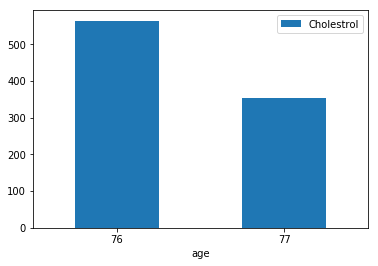

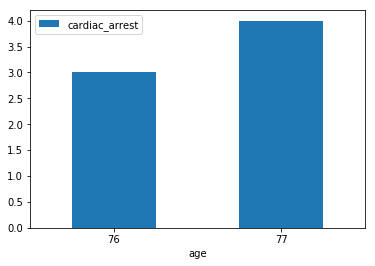

In [15]:
#comparision of High cholestrol levels in male and female groups.
grp.max().plot(x="age",y="Cholestrol",kind="bar",rot=0)
grp.max().plot(x="age",y="cardiac_arrest",kind="bar",rot=0)
plt.show()

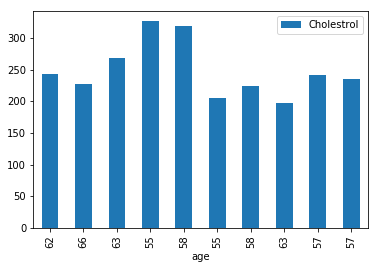

In [16]:
#Graph shows how men have cholestrol levels in their late years.
male.tail(10).plot(x="age",y="Cholestrol",kind="bar")
plt.show()

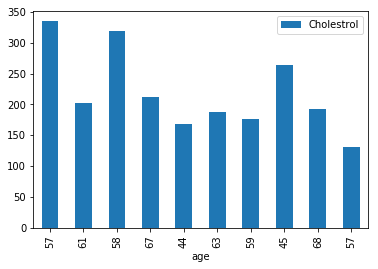

In [17]:
#Graph shows how women have cholestrol levels in their late years.
female.tail(10).plot(x="age",y="Cholestrol",kind="bar")
plt.show()

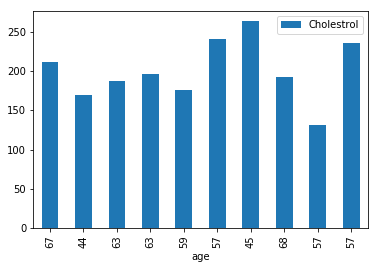

In [18]:
df.tail(10).plot(x="age",y="Cholestrol",kind="bar")
plt.show()

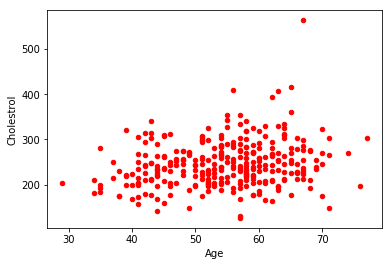

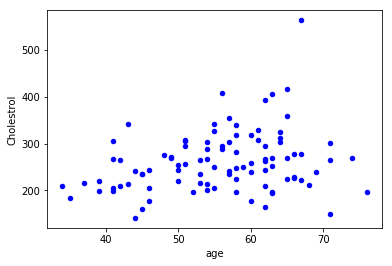

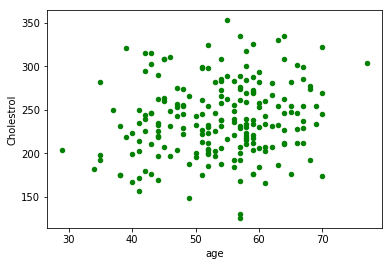

In [19]:
#let's see a scatter to analyse the Trend of Cholestrol levels in Patients.
#All patients
df.plot.scatter("age","Cholestrol",color="r")
plt.xlabel("Age")
plt.ylabel("Cholestrol")
#Male, sex = 1
male.plot.scatter("age","Cholestrol",color="blue")
#Female, sex= 0
female.plot.scatter("age","Cholestrol",color="g")

Text(0, 0.5, 'Cholestrol')

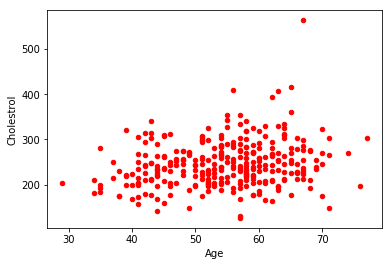

In [20]:
df.plot.scatter("age","Cholestrol",color="r")
plt.xlabel("Age")
plt.ylabel("Cholestrol")

Text(0, 0.5, 'tahacemia_count')

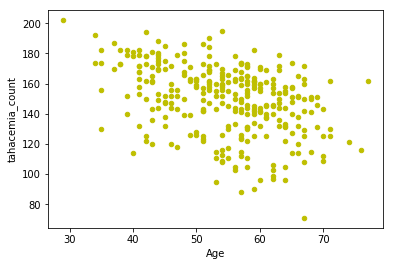

In [21]:
#learning to plot data with other variable as well.
df.plot.scatter("age","tahacemia_count",color="y")
plt.xlabel("Age")
plt.ylabel("tahacemia_count")

In [22]:
#male and female patient
male.age.count(),female.age.count()

(96, 207)

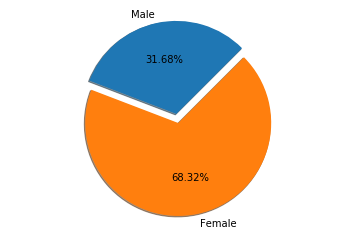

In [23]:
#pie chart  to visualise the patients a
#Pie chart learning
patients =[male.age.count(),female.age.count()]
patients
everyone =["Male","Female"]
plt.pie(patients,labels=everyone,radius=2,autopct="%0.2f%%",shadow=True,explode=[0.1,0.1],startangle =45)
plt.axis("equal")
plt.show()




In [24]:
male.head()

,age,cp,trestbps,Cholestrol,fbs,restecg,tahacemia_count,exang,oldpeak,slope,cardiac_arrest,thal,target
2,41,1,130,204,0,0,172,0,1.4,2,0,2,1
4,57,0,120,354,0,1,163,1,0.6,2,0,2,1
6,56,1,140,294,0,0,153,0,1.3,1,0,2,1
11,48,2,130,275,0,1,139,0,0.2,2,0,2,1
14,58,3,150,283,1,0,162,0,1.0,2,0,2,1


In [25]:
male.Cholestrol.max(),male.Cholestrol.max(),male.Cholestrol.max()

(564, 564, 564)

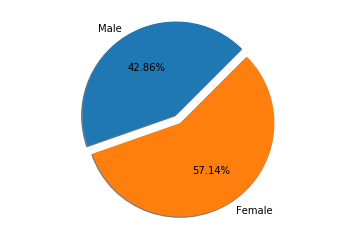

In [26]:
#patinets with heart disease disease.
patients =[male.cardiac_arrest.max(),female.cardiac_arrest.max()]
patients
heart_fail =["Male","Female"]
plt.pie(patients,labels=heart_fail,radius=2,autopct="%0.2f%%",shadow=True,explode=[0.1,0.1],startangle =45)
plt.axis("equal")
plt.show()

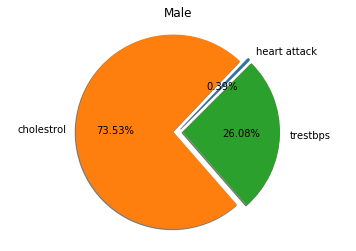

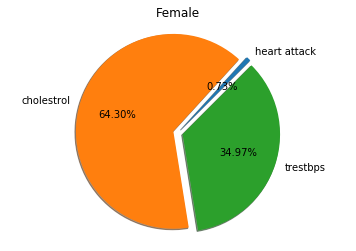

In [27]:
#patinets with heart disease disease.
patients =[male.cardiac_arrest.max(),male.Cholestrol.max(),male.trestbps.max()]
plt.figure(1)
plt.title("Male")
heart_fail =["heart attack","cholestrol","trestbps"]
plt.pie(patients,labels=heart_fail,radius=2,autopct="%0.2f%%",shadow=True,explode=[0.1,0.1,0.1],startangle =45)
plt.axis("equal")
plt.show()
patients =[female.cardiac_arrest.max(),female.Cholestrol.max(),female.trestbps.max()]
plt.figure(2)
plt.title("Female")
heart_fail =["heart attack","cholestrol","trestbps"]
plt.pie(patients,labels=heart_fail,radius=2,autopct="%0.2f%%",shadow=True,explode=[0.1,0.1,0.1],startangle =45)
plt.axis("equal")
plt.show()

In [28]:
##Average age of males and females
female.age.mean(),male.age.mean()


(53.75845410628019, 55.677083333333336)

In [29]:
df["age"]

0      63
1      37
2      41
3      56
4      57
5      57
6      56
7      44
8      52
9      57
10     54
11     48
12     49
13     64
14     58
15     50
16     58
17     66
18     43
19     69
20     59
21     44
22     42
23     61
24     40
25     71
26     59
27     51
28     65
29     53
       ..
273    58
274    47
275    52
276    58
277    57
278    58
279    61
280    42
281    52
282    59
283    40
284    61
285    46
286    59
287    57
288    57
289    55
290    61
291    58
292    58
293    67
294    44
295    63
296    63
297    59
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 303, dtype: int64

In [30]:
reg=linear_model.LinearRegression()

In [31]:
reg.fit(df[["age"]],df.Cholestrol)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
#y= m*x + b
# m is Coefficient so below is m
reg.coef_

array([1.21944129])

In [33]:
#b -> intercept
reg.intercept_

179.9674706591244

In [43]:
#lets predict the cholestrol level at the age of 80
result=reg.predict([[80]])
#y= m*x+b
cholestrol=1.2194412*80+179.9674706591244
result,cholestrol

(array([277.52277396]), 277.5227666591244)

In [48]:
#improving my result with more variables in consideration
mreg=linear_model.LinearRegression()
mreg.fit(df[["age","cardiac_arrest","trestbps"]],df.Cholestrol)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
mreg.coef_

array([1.09336913, 0.53814381, 0.20266895])

In [50]:
mreg.intercept_

159.75299485881925

In [52]:
Cholestrol_level=mreg.predict([[45,1,130]])
Cholestrol_level

array([235.83971313])